In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import sys
from IPython.display import display
from scripts.outliers import clean_dataframe

In [17]:
# Load data
sys.path.append('../')
benin_path = "../data/benin-malanville.csv"

In [18]:
# Load the Benin dataset
benin = pd.read_csv(benin_path)

In [19]:
# Display initial data
print('Benin data: \n')
display(benin.head())

Benin data: 



,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-08-09 00:01,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN
1,2021-08-09 00:02,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN
2,2021-08-09 00:03,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN
3,2021-08-09 00:04,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN
4,2021-08-09 00:05,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN


In [20]:
# Statistics
print('Benin statistics:')
display(benin.describe())


Benin statistics:


,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,240.559452,167.187516,115.358961,236.589496,228.883576,28.179683,54.487969,2.121113,2.809195,0.473390,153.435172,8.582407,994.197199,0.000923,0.001905,35.246026,32.471736,NaN
std,331.131327,261.710501,158.691074,326.894859,316.536515,5.924297,28.073069,1.603466,2.029120,0.273395,102.332842,6.385864,2.474993,0.030363,0.037115,14.807258,12.348743,NaN
min,-12.900000,-7.800000,-12.600000,0.000000,0.000000,11.000000,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,985.000000,0.000000,0.000000,9.000000,8.100000,NaN
25%,-2.000000,-0.500000,-2.100000,0.000000,0.000000,24.200000,28.800000,1.000000,1.300000,0.400000,59.000000,3.700000,993.000000,0.000000,0.000000,24.200000,23.600000,NaN
50%,1.800000,-0.100000,1.600000,4.500000,4.300000,28.000000,55.100000,1.900000,2.600000,0.500000,181.000000,8.600000,994.000000,0.000000,0.000000,30.000000,28.900000,NaN
75%,483.400000,314.200000,216.300000,463.700000,447.900000,32.300000,80.100000,3.100000,4.100000,0.600000,235.100000,12.300000,996.000000,0.000000,0.000000,46.900000,41.500000,NaN
max,1413.000000,952.300000,759.200000,1342.300000,1342.300000,43.800000,100.000000,19.500000,26.600000,4.200000,360.000000,99.400000,1003.000000,1.000000,2.500000,81.000000,72.500000,NaN


In [21]:
# Drop unnecessary columns
columns_to_drop = ['Comments']
benin.drop(columns=columns_to_drop, inplace=True, errors='ignore')

In [22]:

# Remove negative values
benin = benin[(benin['GHI'] >= 0) & (benin['DNI'] >= 0) & (benin['DHI'] >= 0)]


In [23]:
# Convert Timestamp to datetime
benin['Timestamp'] = pd.to_datetime(benin['Timestamp'])


In [24]:
# Clean the DataFrame by removing outliers from specified columns
columns_to_clean = ['ModA', 'ModB', 'WS']
benin_cleaned = clean_dataframe(benin, columns_to_clean)


Detected outliers in column 'ModA':
Empty DataFrame
Columns: [Timestamp, GHI, DNI, DHI, ModA, ModB, Tamb, RH, WS, WSgust, WSstdev, WD, WDstdev, BP, Cleaning, Precipitation, TModA, TModB]
Index: []
Data without outliers in 'ModA':
                 Timestamp   GHI  DNI   DHI  ModA  ModB  Tamb    RH   WS  \
413    2021-08-09 06:54:00  16.7  0.0  16.5  16.1  16.3  24.2  98.8  0.0   
414    2021-08-09 06:55:00  18.2  0.1  18.0  17.4  17.6  24.2  98.8  0.0   
415    2021-08-09 06:56:00  19.7  0.3  19.5  18.7  18.9  24.2  98.8  0.0   
416    2021-08-09 06:57:00  21.1  0.6  20.9  19.9  20.1  24.2  98.9  0.0   
417    2021-08-09 06:58:00  22.5  1.1  22.2  21.1  21.3  24.2  98.9  0.0   
...                    ...   ...  ...   ...   ...   ...   ...   ...  ...   
525158 2022-08-08 16:39:00   4.9  0.0   5.0   5.9   5.8  22.1  99.2  5.2   
525160 2022-08-08 16:41:00   4.8  0.0   4.9   5.8   5.7  22.1  99.2  5.6   
525166 2022-08-08 16:47:00   4.7  0.1   4.7   5.7   5.5  22.2  99.2  5.2   
525167 202

In [25]:
# Visualization of cleaned data for Benin
def plot_time_series(df, title):
    """Plot time series for GHI, DNI, and DHI."""
    fig, ax = plt.subplots(figsize=(14, 6))
    df.plot(x='Timestamp', y=['GHI', 'DNI', 'DHI'], ax=ax)
    ax.set_title(title)
    ax.set_ylabel('Radiance (W/m²)')
    ax.tick_params(axis='x', rotation=45)
    plt.tight_layout()
    plt.show()


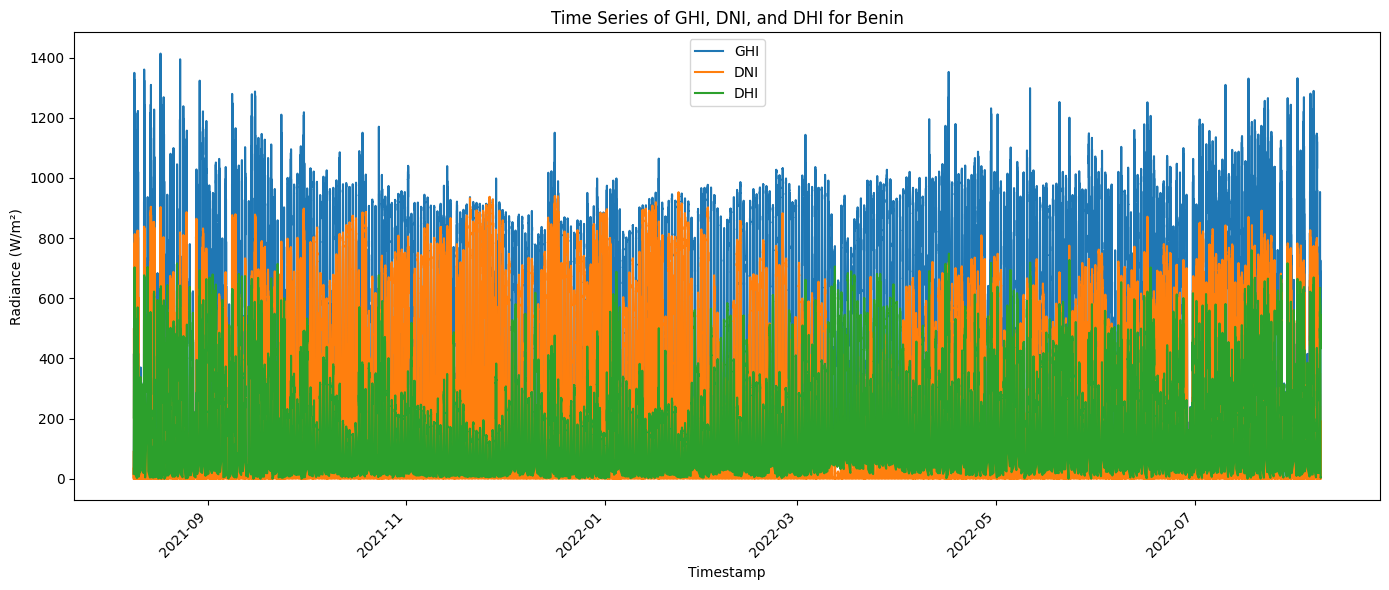

Cleaned Benin Data:
              Timestamp   GHI  DNI   DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
413 2021-08-09 06:54:00  16.7  0.0  16.5  16.1  16.3  24.2  98.8  0.0     0.0   
414 2021-08-09 06:55:00  18.2  0.1  18.0  17.4  17.6  24.2  98.8  0.0     0.0   
415 2021-08-09 06:56:00  19.7  0.3  19.5  18.7  18.9  24.2  98.8  0.0     0.0   
416 2021-08-09 06:57:00  21.1  0.6  20.9  19.9  20.1  24.2  98.9  0.0     0.0   
417 2021-08-09 06:58:00  22.5  1.1  22.2  21.1  21.3  24.2  98.9  0.0     0.0   

     WSstdev   WD  WDstdev   BP  Cleaning  Precipitation  TModA  TModB  
413      0.0  0.0      0.0  997         0            0.0   24.2   23.7  
414      0.0  0.0      0.0  997         0            0.0   24.3   23.8  
415      0.0  0.0      0.0  997         0            0.0   24.3   23.9  
416      0.0  0.0      0.0  997         0            0.0   24.4   23.9  
417      0.0  0.0      0.0  997         0            0.0   24.5   24.0  


In [26]:
# Plot for Benin
plot_time_series(benin_cleaned, 'Time Series of GHI, DNI, and DHI for Benin')

# Display the cleaned DataFrame
print("Cleaned Benin Data:")
print(benin_cleaned.head())

In [ ]:
# Additional analyses
def plot_correlation_heatmap(df):
    """Plot a correlation heatmap for GHI, DNI, DHI, ModA, and ModB."""
    plt.figure(figsize=(10, 8))
    correlation_matrix = df[['GHI', 'DNI', 'DHI', 'ModA', 'ModB']].corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
    plt.title('Correlation Heatmap for Benin')

    plt.show()

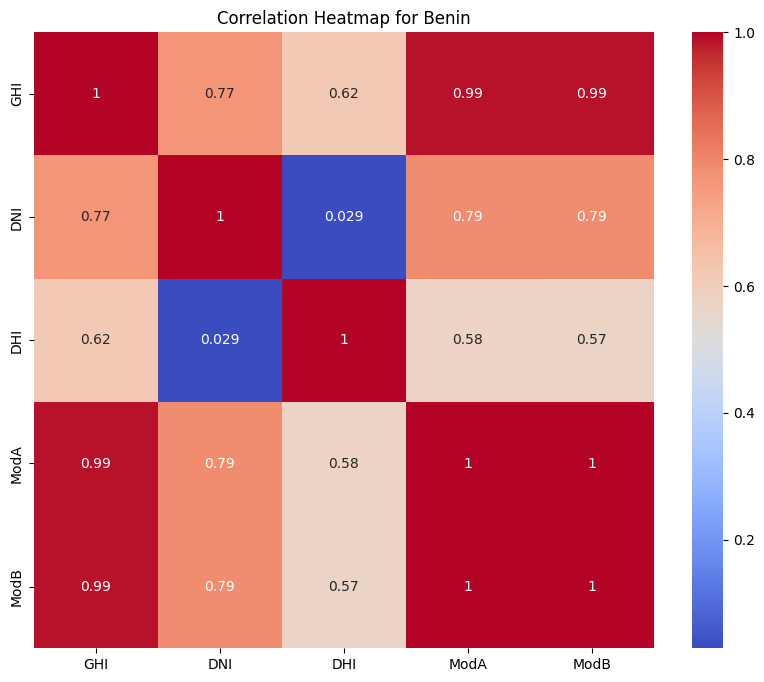

In [ ]:
# Plot correlation heatmap
plot_correlation_heatmap(benin_cleaned)

In [29]:
# Histograms for key variables
def plot_histograms(df):
    """Plot histograms for GHI, DNI, DHI, and WS."""
    fig, axs = plt.subplots(2, 2, figsize=(14, 10))
    df['GHI'].hist(ax=axs[0, 0], bins=20)
    axs[0, 0].set_title('Histogram of GHI')
    df['DNI'].hist(ax=axs[0, 1], bins=20)
    axs[0, 1].set_title('Histogram of DNI')
    df['DHI'].hist(ax=axs[1, 0], bins=20)
    axs[1, 0].set_title('Histogram of DHI')
    df['WS'].hist(ax=axs[1, 1], bins=20)
    axs[1, 1].set_title('Histogram of Wind Speed')
    plt.tight_layout()
    plt.show()

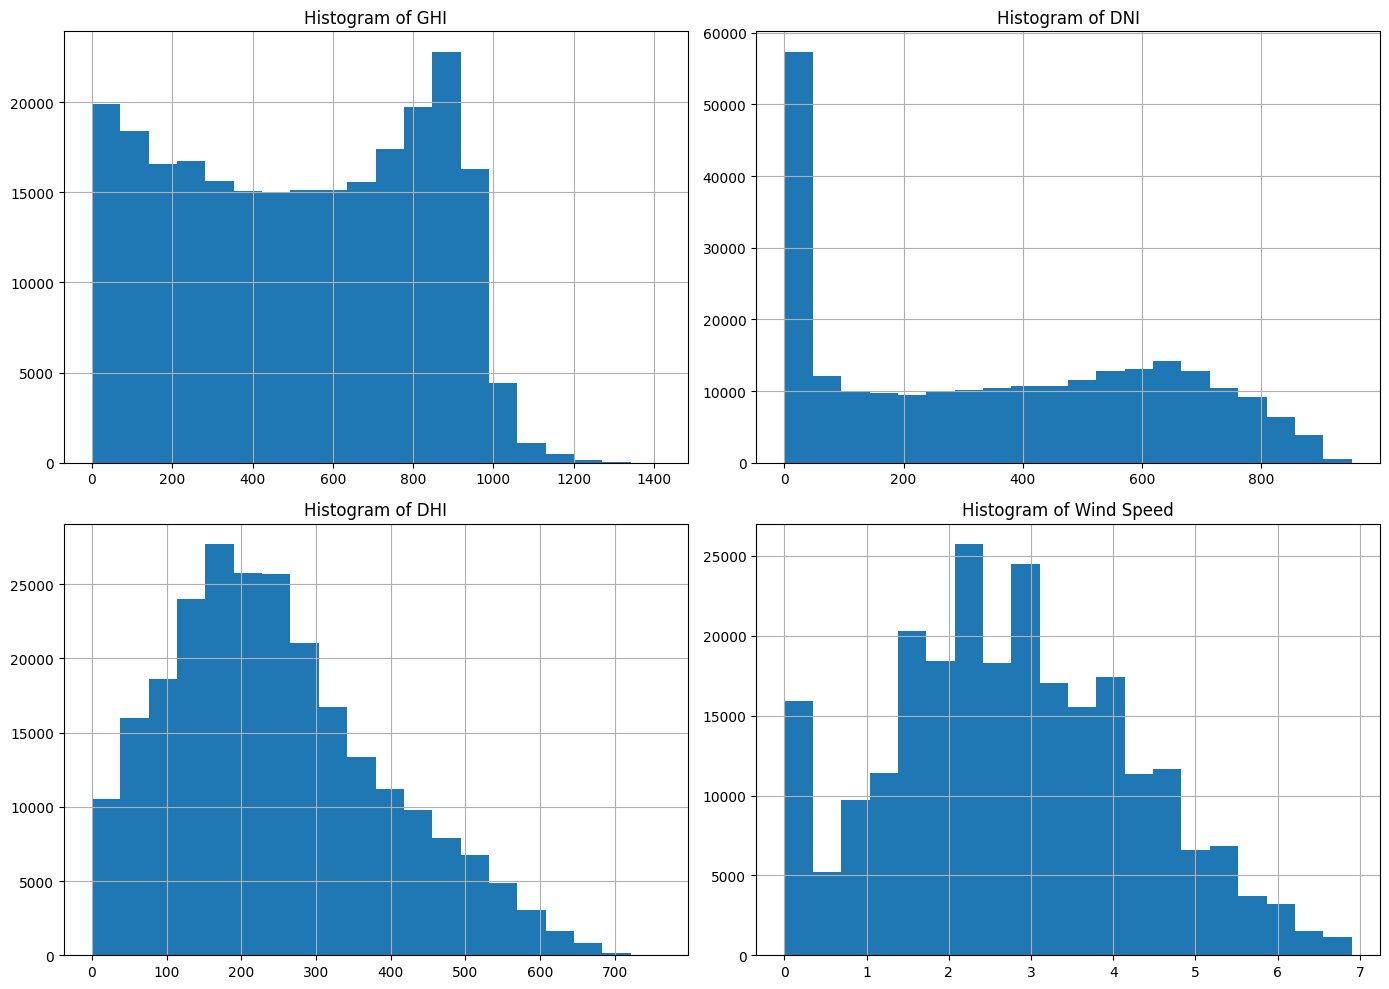

In [30]:
# Plot histograms for cleaned Benin data
plot_histograms(benin_cleaned)

In [31]:
# Scatter plot example
def plot_scatter(df):
    """Scatter plot of GHI vs. Tamb."""
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='GHI', y='Tamb', data=df)
    plt.title('GHI vs. Temperature')
    plt.xlabel('GHI (W/m²)')
    plt.ylabel('Temperature (°C)')
    plt.show()

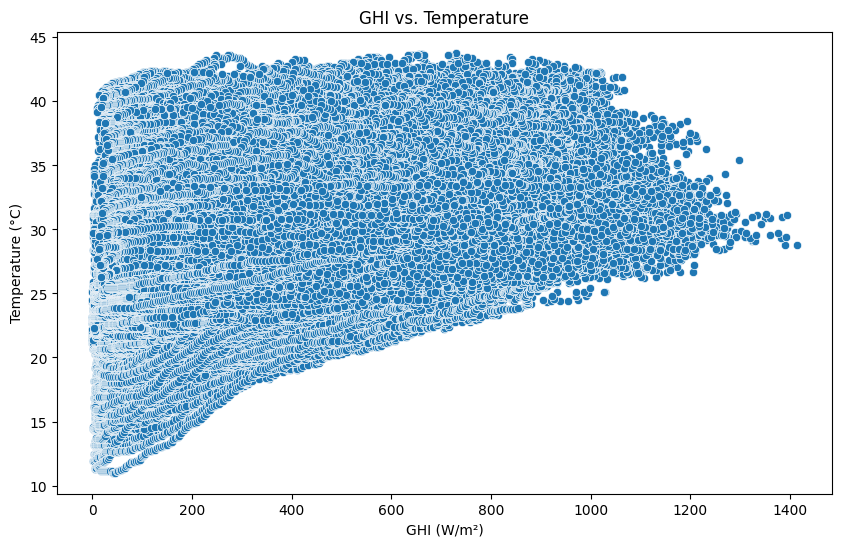

In [32]:
# Plot scatter for GHI vs. Tamb
plot_scatter(benin_cleaned)